# Profitable App Profiles for the App Store and Google Play Markets

Our goal for this project is to find mobile apps that are profitable for App Store and Google Play markets. To achieve that we will analyse all free apps availaible on Google Play and in the App Store to find what type of apps are likely to attract more users.

Since we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means that our revenue for any given app is mostly influenced by the number of users that use our app. Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.

## Opening and Exploring The Data

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

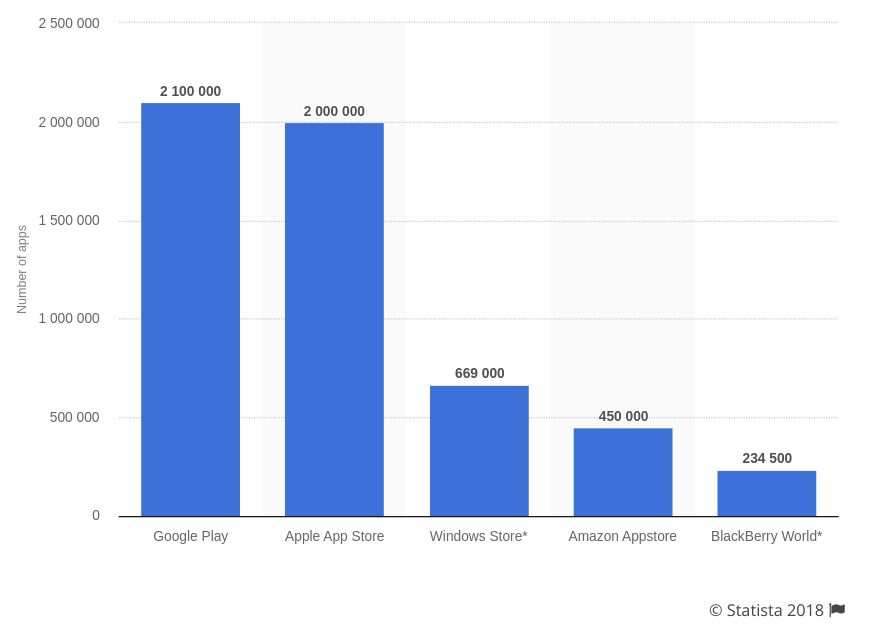
Source: [Statista](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/)

Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources on collecting new data ourselves, we should first try to see if we can find any relevant existing data at no cost. Luckily, here are two datasets that seem suitable for our goals:

1. [A dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018.
2. [A dataset](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017.

We'll start by opening and exploring these two datasets. 

In [1]:
from csv import reader

opened_file = open('googleplaystore.csv')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

opened_file = open('AppleStore.csv')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

To make them easier for explore, we created a function named explore_data() that can repeatedly be used to print rows in a readable way.

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))
        
print(android_header)
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


Google Play data set consist of 13 columns and 10841 apps. Here we pick columns that are only usefull for our analysis `App`, `Category`, `Reviews`, `Installs`, `Type`, `Price`, and `Genres`

Lets look at App Store data set

In [3]:
print(ios_header)
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


We have  7197 apps and 16 columns in App Store data set. Te column we required for analysis are `track_name`, `currency`, `price`, `rating_count_tot`,`rating_count_ver`, and `prime_genre`.

## Deleting Wrong Data

The Google Play data set has a [dedicated discussion](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion) section, and we can see that [one of the discussions](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion/66015) outlines an error for row 10472. Let's print this row and compare it against the header and another row that is correct.

In [4]:
print(android_header)  # header
print('\n')
print(android[0])      # correct row
print('\n')
print(android[10472])  # incorrect row

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


we can observe the row 10472 missing value in the `Category` column. So we will delete this row.

To avoid the code over delete the new row, if accidentally run again. we create `if` condition. so code will only delete if error confirmed.

In [5]:
if len(android[10472]) == 12:
    del android[10472]

What if there were more wrong data. So lets check if any rows have insuffient value. We check Apps Store dataset this way too.

In [6]:
for rows in android:
    if len(rows) != 13:
        print(rows)
        
for rows in ios:
    if len(rows) != 16:
        print(rows)

Perfect. No missing values.

## Remove Duplicate Data

### Part 1
We found some duplicates in android data so we remove them by comparing overall rows.
Here we create new list to keep the unique data sets.

In [7]:
android_unique_data = []

for rows in android:
    if rows not in android_unique_data:
        android_unique_data.append(rows)
        
print('Android total rows                  : ', len(android))
print('Android rows after remove duplicate : ', len(android_unique_data))

Android total rows                  :  10840
Android rows after remove duplicate :  10357


### Part 2
We explore the Google Play data set find that some apps have more than one entry. For instance, the application 'Instagram' has four entries:.

In [8]:
for app in android_unique_data:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


The main difference happens on the 4th position which correspond the number of reviews. The different numbers show that the data was collected at different times. So we'll keep the rows that have the highest number of reviews since it represent latest sample.

To achieve this we create new dictionary `review_max` with app name as the key, the value will represent highest number of reviews, and a new list `clean_android`. If the rows in `android` list matches `review_max` details. the row will be append to `clean_android`.

In [9]:
review_max = {}    # dictionary to keep app with only highest review
clean_android = [] # our final data set will be stored here
already_added = [] # list to help us stop append app if already added.

for app in android_unique_data:
    name = app[0]
    n_review = app[3]
    if name not in review_max:
        review_max[name]  = n_review
    elif n_review > review_max[name]:
        review_max[name]  = n_review
        
for app in android_unique_data:
    name = app[0]
    n_review = app[3]
    if (n_review == review_max[name]) and (name not in already_added):
        already_added.append(name)
        clean_android.append(app)
        
        
print('number unique apps by name : ', len(review_max))
print('number of apps after clean : ', len(clean_android))
        

number unique apps by name :  9659
number of apps after clean :  9659


We cleaned all duplicates and keep required data set in the list `clean_android`
Note we use an extra list `already_added` to avoid adding duplicate some app name with similar ratings.

## Removing Non-English Apps

### Part 1

While exploring we notice apps with names that suggest they are not designed for an English-speaking audience.
Since our focus on analyse apps designed for an English-speaking audience. We like to remove those.

In [10]:
print(ios[813][1])
print(ios[6731][1])

print(clean_android[4412][0])
print(clean_android[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
Wowkwis aq Ka'qaquj
PHARMAGUIDE (DZ)


English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).

All these characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and we can take advantage of that to build a function that checks an app name and tells us whether it contains non-ASCII characters.



### Part 2
We built this function below, and we use the built-in `ord()` function to find out the corresponding encoding number of each character.

In [11]:
def is_english(str):
    for s in str:
        if ord(s) > 127:
            return False
    return True

print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
False
False
False


The function works but it also removes some english app names that contains emojis because that fall outside of the ASCII range. To minimise this mistake we'll only remove an app if the name has more than three non-ASCII characters:

In [12]:
def is_english(str):
    non_ascii = 0
    for s in str:
        if ord(s) > 127:
            non_ascii += 1
    if non_ascii > 3:
        return False
    else:
        return True
    
print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
False
True
True


Perfect. Now we use the function above to remove all non-English apps for both data.

In [13]:
android_english = []
ios_english = []

for app in clean_android:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[1]
    if is_english(name):
        ios_english.append(app)
        
explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

## Isolating the Free Apps

We only build apps that are free to download and install, and our main source of revenue consists of in-app ads. So we'll need to isolate only the free apps for our analysis.

In [14]:
android_free = []
ios_free = []

for app in android_english:
    cost = app[7]
    if cost == '0':
        android_free.append(app)
        
for app in ios_english:
    cost = app[4]
    if cost == '0.0':
        ios_free.append(app)
        
print(len(android_free))
print(len(ios_free))

8862
3222


## Most Common Apps by Genre

In [15]:
def freq_table(dataset, index):
    table = {}
    total = len(dataset)
    
    for row in dataset:
        item = row[index]
        if item in table:
            table[item] += 1
        else:
            table[item] = 1
            
    table_percentage = {}
    for key, value in table.items(): # to loop dictionary key and value in pairs
        percentage = value / total * 100
        table_percentage[key] = percentage
        
    return table_percentage


def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    
    for key, val in table.items():
        key_val_as_tuple = (val, key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
    

### Analyse Genres and Category

Lets explore dataset by `prime_genre` using the `display_table` function we created above.

In [16]:
display_table(ios_free, -5) # prime_genre

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


We see more than a half (58.16%) are games. Next Entertainment apps at 8%, followed by photo and video apps, which are close to 5%. Only 3 of the apps are designed for education and also 3% on social networking app.

The general impression is that App Store (for free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. But we cant confirm it with the number of users yet.

Lets examine the `Genres` and `Category` columns of the Google Play data set (two columns which seem to be related).

In [17]:
display_table(android_free, 1) # Category

FAMILY : 18.934777702550214
GAME : 9.693071541412774
TOOLS : 8.451816745655607
BUSINESS : 4.5926427443015125
LIFESTYLE : 3.9043105393816293
PRODUCTIVITY : 3.8930264048747465
FINANCE : 3.7011961182577298
MEDICAL : 3.5206499661475967
SPORTS : 3.39652448657188
PERSONALIZATION : 3.3175355450236967
COMMUNICATION : 3.238546603475513
HEALTH_AND_FITNESS : 3.080568720379147
PHOTOGRAPHY : 2.945159106296547
NEWS_AND_MAGAZINES : 2.798465357707064
SOCIAL : 2.663055743624464
TRAVEL_AND_LOCAL : 2.335815842924848
SHOPPING : 2.2455427668697814
BOOKS_AND_REFERENCE : 2.143985556307831
DATING : 1.8618821936357481
VIDEO_PLAYERS : 1.7941773865944481
MAPS_AND_NAVIGATION : 1.399232678853532
FOOD_AND_DRINK : 1.2412547957571656
EDUCATION : 1.1735499887158656
ENTERTAINMENT : 0.9591514330850823
LIBRARIES_AND_DEMO : 0.9365831640713158
AUTO_AND_VEHICLES : 0.9252990295644324
HOUSE_AND_HOME : 0.8237418190024826
WEATHER : 0.8011735499887158
EVENTS : 0.7109004739336493
PARENTING : 0.6544798013992327
ART_AND_DESIGN : 0.

On Google Play we can see good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

In [18]:
display_table(android_free, 9) # Genres

Tools : 8.440532611148726
Entertainment : 6.070864364703228
Education : 5.348679756262695
Business : 4.5926427443015125
Productivity : 3.8930264048747465
Lifestyle : 3.8930264048747465
Finance : 3.7011961182577298
Medical : 3.5206499661475967
Sports : 3.4642292936131795
Personalization : 3.3175355450236967
Communication : 3.238546603475513
Action : 3.1031369893929135
Health & Fitness : 3.080568720379147
Photography : 2.945159106296547
News & Magazines : 2.798465357707064
Social : 2.663055743624464
Travel & Local : 2.324531708417964
Shopping : 2.2455427668697814
Books & Reference : 2.143985556307831
Simulation : 2.0424283457458814
Dating : 1.8618821936357481
Arcade : 1.8505980591288649
Video Players & Editors : 1.7716091175806816
Casual : 1.7490408485669149
Maps & Navigation : 1.399232678853532
Food & Drink : 1.2412547957571656
Puzzle : 1.128413450688332
Racing : 0.9930038366057323
Role Playing : 0.9365831640713158
Libraries & Demo : 0.9365831640713158
Auto & Vehicles : 0.92529902956443

Examining Genres we notice its more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the Category column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users

## Most Popular Apps by Genre on the App Store

Now, we'd like to determine the kind of apps with the most users.

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the App Store dataset we'll take the total number of user ratings as a proxy, which we can find in the `rating_count_tot` app.

In [19]:
ios_genre_rating = {}
genre_app = {} # The helper dictionary to record number of apps in each genres.

total = 0
for app in ios_free:
    genre   = app[11]
    install = app[5]
    install = float(install)
    total   += install
    if genre not in ios_genre_rating:
        ios_genre_rating[genre] = install
        genre_app[genre] = 1
    else:
        ios_genre_rating[genre] += install
        genre_app[genre] += 1
    
for gen in ios_genre_rating:
    average = ios_genre_rating[gen]/genre_app[gen]
    print(gen, average)

Social Networking 71548.34905660378
Photo & Video 28441.54375
Games 22788.6696905016
Music 57326.530303030304
Reference 74942.11111111111
Health & Fitness 23298.015384615384
Weather 52279.892857142855
Utilities 18684.456790123455
Travel 28243.8
Shopping 26919.690476190477
News 21248.023255813954
Navigation 86090.33333333333
Lifestyle 16485.764705882353
Entertainment 14029.830708661417
Food & Drink 33333.92307692308
Sports 23008.898550724636
Book 39758.5
Finance 31467.944444444445
Education 7003.983050847458
Productivity 21028.410714285714
Business 7491.117647058823
Catalogs 4004.0
Medical 612.0


Navigation apps which have the highest number of user reviews, because its heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [20]:
for app in ios_free:
    #print(app[11])
    if app[11] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


Next social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages, but we'll leave this level of detail for later.

Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [21]:
for app in ios_free:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


However, this niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

- Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

- Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

- Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

## Most Popular Apps by Genre on Google Play

For the Google Play dataset, we can find the number of app installed in `Installs` column.

In [22]:
display_table(android_free, 5) # Genres

1,000,000+ : 15.741367637102236
100,000+ : 11.554953735048521
10,000,000+ : 10.516813360415256
10,000+ : 10.200857594222523
1,000+ : 8.395396073121193
100+ : 6.917174452719477
5,000,000+ : 6.838185511171294
500,000+ : 5.574362446400361
50,000+ : 4.773188896411646
5,000+ : 4.513653802753328
10+ : 3.5432182351613632
500+ : 3.2498307379823967
50,000,000+ : 2.2906793048973144
100,000,000+ : 2.1214172872940646
50+ : 1.9183028661701647
5+ : 0.7898894154818324
1+ : 0.5077860528097494
500,000,000+ : 0.2708192281651997
1,000,000,000+ : 0.22568269013766643
0+ : 0.045136538027533285
0 : 0.011284134506883321


the problem with this data that it shows only numbers approximates 100,000+, 200,000+ etc. 

Since we don't need perfect precision we take aproximates itself as number. Means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

In [23]:
android_genre_rating = {}
genre_app = {} # The helper dictionary to record the number of apps in each genres.

total = 0
for app in android_free:
    genre   = app[1]
    install = app[5]
    install = install.replace(',','')
    install = install.replace('+','')
    install = float(install)
    total   += install
    if genre not in android_genre_rating:
        android_genre_rating[genre] = install
        genre_app[genre] = 1
    else:
        android_genre_rating[genre] += install
        genre_app[genre] += 1
    
for gen in android_genre_rating:
    average = android_genre_rating[gen]/genre_app[gen]
    print(gen, average)
    

ART_AND_DESIGN 1986335.0877192982
AUTO_AND_VEHICLES 647317.8170731707
BEAUTY 513151.88679245283
BOOKS_AND_REFERENCE 8767811.894736841
BUSINESS 1712290.1474201474
COMICS 817657.2727272727
COMMUNICATION 38456119.167247385
DATING 854028.8303030303
EDUCATION 1820673.076923077
ENTERTAINMENT 11640705.88235294
EVENTS 253542.22222222222
FINANCE 1387692.475609756
FOOD_AND_DRINK 1924897.7363636363
HEALTH_AND_FITNESS 4188821.9853479853
HOUSE_AND_HOME 1331540.5616438356
LIBRARIES_AND_DEMO 638503.734939759
LIFESTYLE 1437816.2687861272
GAME 15560965.599534342
FAMILY 3694276.334922527
MEDICAL 120616.48717948717
SOCIAL 23253652.127118643
SHOPPING 7036877.311557789
PHOTOGRAPHY 17805627.643678162
SPORTS 3638640.1428571427
TRAVEL_AND_LOCAL 13984077.710144928
TOOLS 10682301.033377837
PERSONALIZATION 5201482.6122448975
PRODUCTIVITY 16787331.344927534
PARENTING 542603.6206896552
WEATHER 5074486.197183099
VIDEO_PLAYERS 24727872.452830188
NEWS_AND_MAGAZINES 9549178.467741935
MAPS_AND_NAVIGATION 4056941.774193

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [24]:
for app in android_free:
    if (app[1] == 'COMMUNICATION') and (app[5] == '1,000,000,000+' or app[5] == '500,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Viber Messenger : 500,000,000+


If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times:

In [25]:
under_100_m = []

for app in android_free:
    install = app[5]
    install = install.replace(',', '')
    install = install.replace('+', '')
    install = float(install)
    if (app[1] == 'COMMUNICATION') and (install < 100000000):
        under_100_m.append(install)
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

In [26]:
for app in android_free:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

In [27]:
for app in android_free:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [28]:
for app in android_free:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

## Conclusion

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.